# Example 7: Benchmark PyTracerLab against TracerLPM
In this example, we benchmark simulation results from PyTracerLab against equivalent results obtained from TracerLPM. We consider the tracer input data given in Example 3 of the TracerLPM documentation [(Jurgens et al., 2012)](https://pubs.usgs.gov/publication/tm4F3). We generated simulation results using different model units in TracerLPM and compare those results against those obtained with PyTracerLab.

In [1]:
import PyTracerLab.model as ism
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl
from datetime import datetime
import pandas as pd
import seaborn as sns

## 1. Load Tracer Input Signal

In [2]:
# load input series
# this would be the tracer concentration in precipitation or recharge in a
# practical problem
file_name = "TracerLPM_benchmark_input_yearly.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float],
    encoding="utf-8",
    skip_header=1
)

timestamps = np.array([datetime.strptime(row[0], r"%Y") for row in data])
input_series = np.array([row[1] for row in data], dtype=float)

In [3]:
# load benchmark data
file_name = "TracerLPM_benchmark_simulations_1.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float, float, float, float],
    encoding="utf-8",
    skip_header=1
)

timestamps_benchmark = np.array([datetime.strptime(row[0], r"%Y") for row in data])
data_benchmark_1 = np.array([[row[1], row[2], row[3], row[4]] for row in data], dtype=float)

In [4]:
# load benchmark data case 2
file_name = "TracerLPM_benchmark_simulations_2.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float, float, float, float],
    encoding="utf-8",
    skip_header=1
)

data_benchmark_2 = np.array([[row[1], row[2], row[3], row[4]] for row in data], dtype=float)

In [5]:
# load benchmark data case 2
file_name = "TracerLPM_benchmark_simulations_3.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float, float, float, float],
    encoding="utf-8",
    skip_header=1
)

data_benchmark_3 = np.array([[row[1], row[2], row[3], row[4]] for row in data], dtype=float)

## 2. Get PyTracerLab Results

### 2.1 Piston Flow

#### Case 1

In [6]:
# define list of result time series
pm_sims = []
pm_bms = []

In [7]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
pm_mtt_true = 15. # 15 years
m.add_unit(
    ism.PMUnit(mtt=pm_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="pm"
)

# simulate
pm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 0],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=pm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
pm_sims.append(sim)
pm_bms.append(bm)

In [8]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
pm_mtt_true = 20. # 20 years
m.add_unit(
    ism.PMUnit(mtt=pm_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="pm"
)

# simulate
pm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 0],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=pm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
pm_sims.append(sim)
pm_bms.append(bm)

In [9]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
pm_mtt_true = 30. # 20 years
m.add_unit(
    ism.PMUnit(mtt=pm_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="pm"
)

# simulate
pm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 0],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=pm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
pm_sims.append(sim)
pm_bms.append(bm)

### 2.2 Exponential Model

#### Case 1

In [10]:
# define list of result time series
em_sims = []
em_bms = []

In [11]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
em_mtt_true = 15. # 15 years
m.add_unit(
    ism.EMUnit(mtt=em_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="em"
)

# simulate
em_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 1],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=em_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
em_sims.append(sim)
em_bms.append(bm)

In [12]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
em_mtt_true = 20. # 20 years
m.add_unit(
    ism.EMUnit(mtt=em_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="em"
)

# simulate
em_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 1],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=em_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
em_sims.append(sim)
em_bms.append(bm)

In [13]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
em_mtt_true = 30. # 20 years
m.add_unit(
    ism.EMUnit(mtt=em_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="em"
)

# simulate
em_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 1],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=em_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
em_sims.append(sim)
em_bms.append(bm)

### 2.3 Exponential Piston Flow

#### Case 1

In [14]:
# define list of result time series
epm_sims = []
epm_bms = []

In [15]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
epm_mtt_true = 15. # 15 years
epm_eta_true = 0.5 + 1. # epm_ratio + 1
m.add_unit(
    ism.EPMUnit(mtt=epm_mtt_true, eta=epm_eta_true),
    fraction=1., # 100 percent of the overall response
    prefix="epm"
)

# simulate
epm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 2],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=epm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
epm_sims.append(sim)
epm_bms.append(bm)

In [16]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
epm_mtt_true = 20. # 15 years
epm_eta_true = 0.7 + 1. # epm_ratio + 1
m.add_unit(
    ism.EPMUnit(mtt=epm_mtt_true, eta=epm_eta_true),
    fraction=1., # 100 percent of the overall response
    prefix="epm"
)

# simulate
epm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 2],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=epm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
epm_sims.append(sim)
epm_bms.append(bm)

In [17]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
epm_mtt_true = 30. # 15 years
epm_eta_true = 0.8 + 1. # epm_ratio + 1
m.add_unit(
    ism.EPMUnit(mtt=epm_mtt_true, eta=epm_eta_true),
    fraction=1., # 100 percent of the overall response
    prefix="epm"
)

# simulate
epm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 2],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=epm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
epm_sims.append(sim)
epm_bms.append(bm)

### 2.4 Dispersion Model

#### Case 1

In [18]:
# define list of result time series
dm_sims = []
dm_bms = []

In [19]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
dm_mtt_true = 15. # 15 years
dm_dp_true = 0.5
m.add_unit(
    ism.DMUnit(mtt=dm_mtt_true, DP=dm_dp_true),
    fraction=1., # 100 percent of the overall response
    prefix="dm"
)

# simulate
dm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 3],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=dm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
dm_sims.append(sim)
dm_bms.append(bm)

In [20]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
dm_mtt_true = 20. # 15 years
dm_dp_true = 0.7
m.add_unit(
    ism.DMUnit(mtt=dm_mtt_true, DP=dm_dp_true),
    fraction=1., # 100 percent of the overall response
    prefix="dm"
)

# simulate
dm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 3],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=dm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
dm_sims.append(sim)
dm_bms.append(bm)

In [21]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
dm_mtt_true = 30. # 15 years
dm_dp_true = 0.8
m.add_unit(
    ism.DMUnit(mtt=dm_mtt_true, DP=dm_dp_true),
    fraction=1., # 100 percent of the overall response
    prefix="dm"
)

# simulate
dm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 3],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=dm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
dm_sims.append(sim)
dm_bms.append(bm)

# Create Global Figures

Text(0.5, 1.0, 'Dist. of Errors')

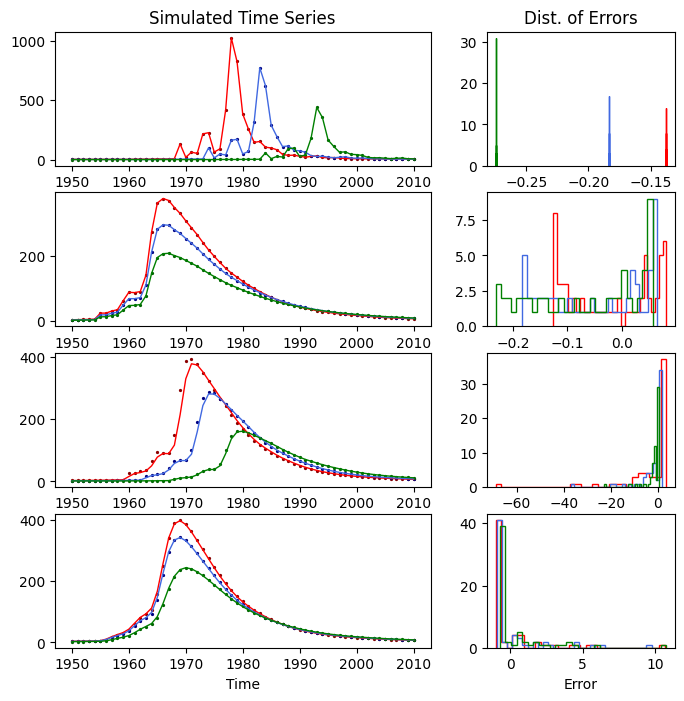

In [22]:
fig, ax = plt.subplots(
    4, 2,
    figsize=(8, 8),
    gridspec_kw={"width_ratios": [2, 1]},
    # sharex="col"
)

simulation_data = [pm_sims, em_sims, epm_sims, dm_sims]
benchmark_data = [pm_bms, em_bms, epm_bms, dm_bms]

colors_1 = ["red", "royalblue", "green"]
colors_2 = ["darkred", "navy", "darkgreen"]

# iterate over models / units
for i in range(4):
    unit_sims = simulation_data[i]
    unit_bms = benchmark_data[i]

    for j in range(len(unit_sims)):
        # plot simulation
        ax[i, 0].plot(
            unit_sims[j].index,
            unit_sims[j].values,
            c=colors_1[j],
            lw=1.
        )
        # plot benchmark
        ax[i, 0].scatter(
            unit_bms[j].index,
            unit_bms[j].values,
            c=colors_2[j],
            marker=".",
            s=7.
        )

        # plot errors
        errors = ((unit_sims[j].values - unit_bms[j].values) / unit_sims[j].values) * 100.
        # errors = (unit_sims[j].values - unit_bms[j].values)
        
        ax[i, 1].hist(
            errors,
            30,
            histtype="step",
            color=colors_1[j],
        )

# global settings
ax[-1, 0].set_xlabel("Time")
ax[0, 0].set_title("Simulated Time Series")
ax[-1, 1].set_xlabel("Error")
ax[0, 1].set_title("Dist. of Errors")

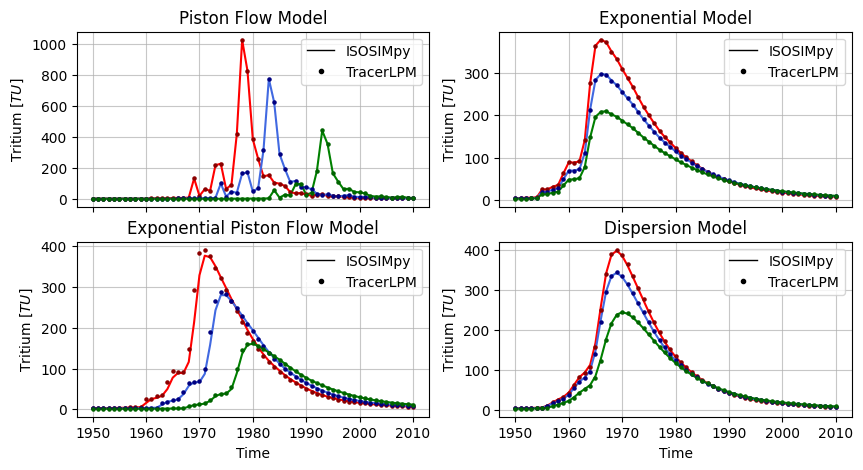

In [23]:
fig, ax = plt.subplots(
    2, 2,
    figsize=(10, 5),
    sharex="col",
    # sharey="row"
)

simulation_data = [pm_sims, em_sims, epm_sims, dm_sims]
benchmark_data = [pm_bms, em_bms, epm_bms, dm_bms]

names = ["Piston Flow Model", "Exponential Model", "Exponential Piston Flow Model", "Dispersion Model"]

colors_1 = ["red", "royalblue", "green"]
colors_2 = ["darkred", "navy", "darkgreen"]

# iterate over models / units
for i in range(4):
    unit_sims = simulation_data[i]
    unit_bms = benchmark_data[i]

    ax_ = ax.flatten()[i]

    for j in range(len(unit_sims)):
        # plot simulation
        ax_.plot(
            unit_sims[j].index,
            unit_sims[j].values,
            c=colors_1[j],
            lw=1.5,
            zorder=100
        )
        # plot benchmark
        ax_.scatter(
            unit_bms[j].index,
            unit_bms[j].values,
            c=colors_2[j],
            marker=".",
            s=20.,
            zorder=1000
        )
    # compose legend
    legend_elements = [
        Line2D([0], [0], color="k", lw=1, label="PyTracerLab"),
        Line2D([0], [0], marker=".", color="w",
               markerfacecolor="k", markeredgecolor="k", label="TracerLPM")
               ]
    ax_.legend(handles=legend_elements, loc="upper right")
    ax_.set_title(names[i])
    ax_.set_ylabel(r"Tritium $ [TU] $")
    ax_.grid(True, zorder=0, alpha=0.7)
    #ax_.set_xlim(unit_sims[j].index[0], unit_sims[j].index[-1])

    if i > 1:
        ax_.set_xlabel("Time")

# plt.savefig("simulation_benchmark.png", dpi=400, bbox_inches="tight")

## Calibration Benchmark

In [24]:
# input is already loaded

# # load observations
# file_name = "TracerLPM_benchmark_observations_6monthly.csv"
# data = np.genfromtxt(
#     file_name,
#     delimiter=",",
#     dtype=["<U7", float],
#     encoding="utf-8",
#     skip_header=1
# )

# obs_timestamps = np.array([datetime.strptime(row[0], r"%Y-%m") for row in data])
# obs_series = np.array([[row[1]] for row in data], dtype=float)

In [25]:
# load input series with 6 month resolution
# this would be the tracer concentration in precipitation or recharge in a
# practical problem
file_name = "TracerLPM_benchmark_input_6monthly.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float],
    encoding="utf-8",
    skip_header=1
)

timestamps = np.array([datetime.strptime(row[0], r"%Y-%m") for row in data])
input_series = np.array([row[1] for row in data], dtype=float)

In [26]:
# generate synthetic observations
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 0.5 years
m_obs = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=None,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

dmfrac_1 = .2
dmfrac_2 = 1 - dmfrac_1

# add a dispersion model unit
# define the true model parameters
dm1_mtt_init = 2.
dm1_DP_init = .1
m_obs.add_unit(
    ism.DMUnit(mtt=dm1_mtt_init, DP=dm1_DP_init),
    fraction=dmfrac_1,
    bounds=[(0., 20.), (.001, 10.)],
    prefix="dm1"
)

# add a second dispersion model unit
# define the true model parameters
dm2_mtt_init = 25.
dm2_DP_init = .1
m_obs.add_unit(
    ism.DMUnit(mtt=dm2_mtt_init, DP=dm2_DP_init),
    fraction=dmfrac_2,
    bounds=[(10., 100.), (.001, 10.)],
    prefix="dm2"
)

# create a solver
sim_reference = m_obs.simulate()

In [27]:
# get observations from reference simulation
# define number of observations to get
n_obs = 20 # 20

# n_obs=10, seed=1234567

# set random seed
np.random.seed(123456) # 1234

# get random observations from the reference simulation
obs_idx = np.random.choice([i for i in range(130, len(input_series))], n_obs, replace=False)
obs_idx = [i for i in range(120, 240)][2::8]
obs_idx = [120, 130, 134, 155, 175, 185, 190, 195]
n_obs = len(obs_idx)
obs_timestamps = timestamps[obs_idx]
obs_values = sim_reference[obs_idx]

# add noise to observations
# define observation noise level
obs_noise = 5
obs_values += np.random.normal(0, obs_noise, size=n_obs)

# make series we can later use in the model (has to be the same length as
# the input series, filled with NaN-values where we do not have any
# observations)
obs_series = np.full(len(input_series), np.nan)
obs_series[obs_idx] = obs_values

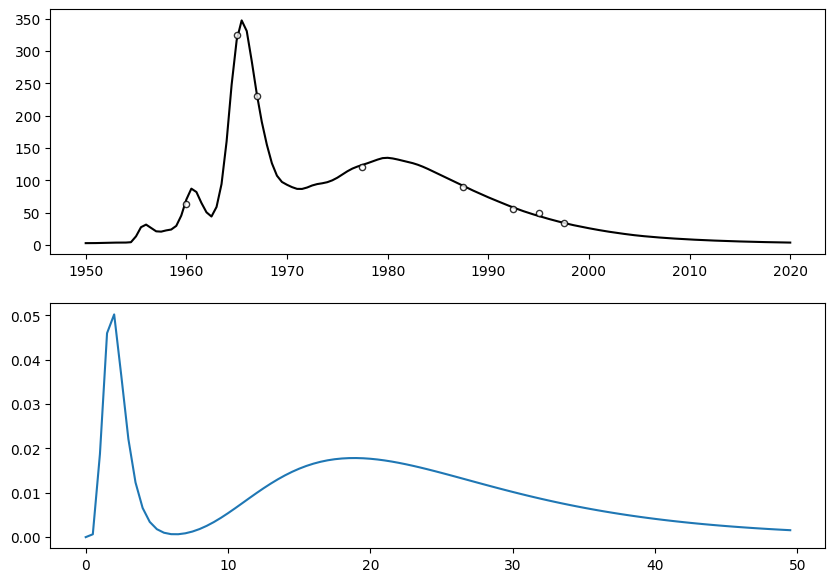

In [28]:
# plot noisy observations and reference simulation
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

start = 100
# ax.plot(timestamps, input_series, label="Input")
ax[0].plot(timestamps[start:], sim_reference[start:], c="k", label="Reference Simulation")
# ax.plot(timestamps, input_series, c="grey", label="Reference Simulation")
ax[0].scatter(
    timestamps[start:], obs_series[start:],
    marker="o", facecolor="w",
    edgecolor="k", s=20,
    zorder=100, alpha=0.8,
    lw=1.
)

step_limit = 100
dt = 0.5
t_plot = [dt * i for i in range(step_limit)]
age_distributions = m_obs.get_age_distributions()
ax[1].plot(
    t_plot, 
    age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit] + \
    age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit]
)

# ax.set_yscale("log")

### Original Model Hyperparameters

In [29]:
# generate synthetic observations
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 0.5 years
m1 = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

dmfrac_11 = .2
dmfrac_12 = 1 - dmfrac_11

# add a dispersion model unit
# define the true model parameters
dm1_mtt_init = 5.
dm1_DP_init = .5
m1.add_unit(
    ism.DMUnit(mtt=dm1_mtt_init, DP=dm1_DP_init),
    fraction=dmfrac_11,
    bounds=[(1., 100.), (.001, 5.)],
    prefix="dm1"
)

# add a second dispersion model unit
# define the true model parameters
dm2_mtt_init = 50.
dm2_DP_init = .5
m1.add_unit(
    ism.DMUnit(mtt=dm2_mtt_init, DP=dm2_DP_init),
    fraction=dmfrac_12,
    bounds=[(1., 100.), (.001, 5.)],
    prefix="dm2"
)

# create a solver
m1_solver = ism.Solver(m1)
res_1_x, res_1 = m1_solver.differential_evolution()

In [30]:
# those settings are reused for all MCMC runs of all models
n_samples = 1000
burn_in = 2000
thin = 1
n_cr = 4
sigma = np.sqrt(obs_noise) # 1.
step_scale = .1 # .00005

{'dm1.DP': 1.0110899183694535, 'dm1.mtt': 1.0101446738194688, 'dm2.DP': 1.0170066778203544, 'dm2.mtt': 1.014278932162742}


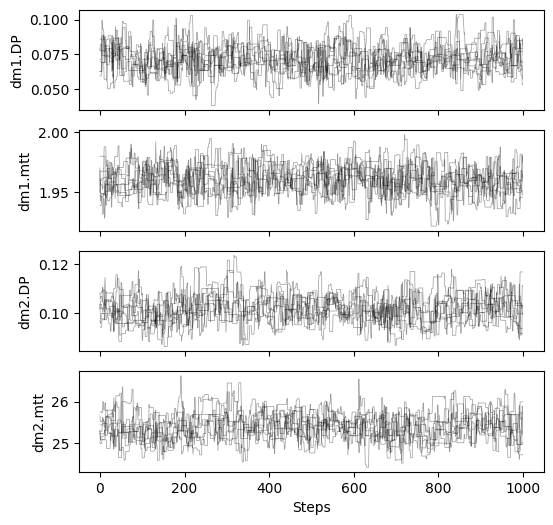

In [31]:
res_mcmc_1 = m1_solver.dream_sample(
    n_samples=n_samples,
    n_chains=None,
    burn_in=burn_in,
    thin=thin,
    cr=[i / n_cr for i in range(1, n_cr + 1)],
    sigma=sigma,
    start=[1., 5., 1., 5.],
    return_sim=True,
    random_state=42
)

# plot chains to inspect convergence
fig, ax = plt.subplots(res_mcmc_1["samples_chain"].shape[2], 1, figsize=(6, 6), sharex=True)

for i in range(res_mcmc_1["samples_chain"].shape[2]):
    for j in range(res_mcmc_1["samples_chain"].shape[0]):
        ax[i].plot(res_mcmc_1["samples_chain"][j, :, i], c="k", lw=.5, alpha=0.4)
    ax[i].set_ylabel(m1.param_keys(free_only=True)[i])
ax[-1].set_xlabel("Steps")

# print gelman rubin convergence statistics
print(res_mcmc_1["gelman_rubin"])

### Mixing Ratio Case 2

In [32]:
# generate synthetic observations
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 0.5 years
m2 = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

dmfrac_21 = .1
dmfrac_22 = 1 - dmfrac_21

# add a dispersion model unit
# define the true model parameters
dm1_mtt_init = 5.
dm1_DP_init = .5
m2.add_unit(
    ism.DMUnit(mtt=dm1_mtt_init, DP=dm1_DP_init),
    fraction=dmfrac_21,
    bounds=[(1., 100.), (.001, 5.)],
    prefix="dm1"
)

# add a second dispersion model unit
# define the true model parameters
dm2_mtt_init = 50.
dm2_DP_init = .5
m2.add_unit(
    ism.DMUnit(mtt=dm2_mtt_init, DP=dm2_DP_init),
    fraction=dmfrac_22,
    bounds=[(1., 100.), (.001, 5.)],
    prefix="dm2"
)

# create a solver
m2_solver = ism.Solver(m2)
res_2_x, res_2 = m2_solver.differential_evolution()

{'dm1.DP': 1.0119013403497996, 'dm1.mtt': 1.023801702873517, 'dm2.DP': 1.0509845428262399, 'dm2.mtt': 1.0532532511802708}


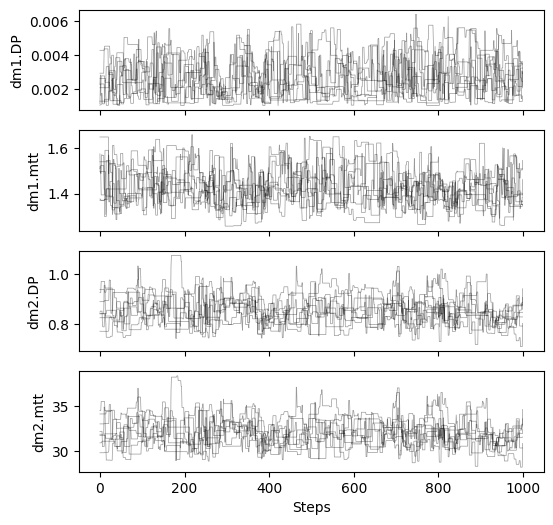

In [33]:
res_mcmc_2 = m2_solver.dream_sample(
    n_samples=n_samples,
    n_chains=None,
    burn_in=burn_in,
    thin=thin,
    cr=[i / n_cr for i in range(1, n_cr + 1)],
    sigma=sigma,
    start=[1., 5., 1., 5.],
    return_sim=True,
    random_state=42
)

# plot chains to inspect convergence
fig, ax = plt.subplots(res_mcmc_2["samples_chain"].shape[2], 1, figsize=(6, 6), sharex=True)

for i in range(res_mcmc_2["samples_chain"].shape[2]):
    for j in range(res_mcmc_2["samples_chain"].shape[0]):
        ax[i].plot(res_mcmc_2["samples_chain"][j, :, i], c="k", lw=.5, alpha=0.4)
    ax[i].set_ylabel(m2.param_keys(free_only=True)[i])
ax[-1].set_xlabel("Steps")

# print gelman rubin convergence statistics
print(res_mcmc_2["gelman_rubin"])

### Mixing Ratio Case 3

In [34]:
# generate synthetic observations
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 0.5 years
m3 = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add a dispersion model unit
# define the true model parameters
epm_mtt_init = 5.
epm_eta_init = 1.5
m3.add_unit(
    ism.EPMUnit(mtt=epm_mtt_init, eta=epm_eta_init),
    fraction=1.,
    bounds=[(1., 100.), (1., 2.)],
    prefix="epm"
)

# create a solver
m3_solver = ism.Solver(m3)
res_3_x, res_3 = m3_solver.differential_evolution()

{'epm.eta': 1.0134501316329605, 'epm.mtt': 1.0098668813203675}


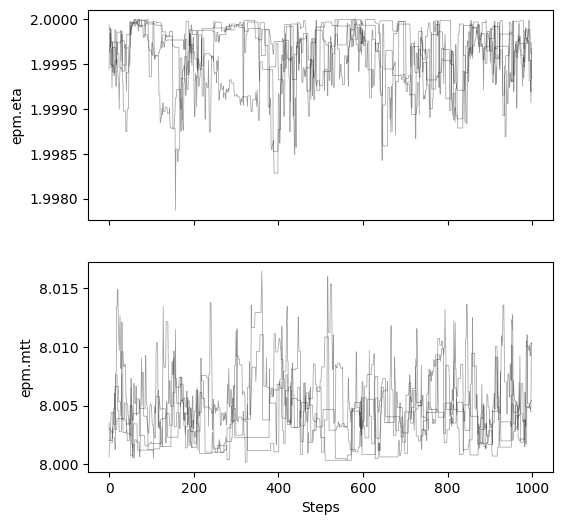

In [44]:
res_mcmc_3 = m3_solver.dream_sample(
    n_samples=n_samples,
    n_chains=None,
    burn_in=burn_in,
    thin=thin,
    cr=[i / n_cr for i in range(1, n_cr + 1)],
    sigma=sigma,
    start=[1.5, 1.5],
    return_sim=True,
    n_diff_pairs=1,
    random_state=1234
)

# plot chains to inspect convergence
fig, ax = plt.subplots(res_mcmc_3["samples_chain"].shape[2], 1, figsize=(6, 6), sharex=True)

for i in range(res_mcmc_3["samples_chain"].shape[2]):
    for j in range(res_mcmc_3["samples_chain"].shape[0]):
        ax[i].plot(res_mcmc_3["samples_chain"][j, :, i], c="k", lw=.5, alpha=0.4)
    ax[i].set_ylabel(m3.param_keys(free_only=True)[i])
ax[-1].set_xlabel("Steps")

# print gelman rubin convergence statistics
print(res_mcmc_3["gelman_rubin"])

### Mixing Ratio Case 4

In [45]:
# generate synthetic observations
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 0.5 years
m4 = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

pmfrac = .05
dmfrac = 1 - pmfrac

# add a dispersion model unit
# define the true model parameters
pm_mtt_init = 5.
m4.add_unit(
    ism.PMUnit(mtt=pm_mtt_init),
    fraction=pmfrac,
    bounds=[(1., 100.)],
    prefix="pm"
)

# add a second dispersion model unit
# define the true model parameters
dm2_mtt_init = 50.
dm2_DP_init = .5
m4.add_unit(
    ism.DMUnit(mtt=dm2_mtt_init, DP=dm2_DP_init),
    fraction=dmfrac,
    bounds=[(1., 100.), (.001, 5.)],
    prefix="dm"
)

# create a solver
m4_solver = ism.Solver(m4)
res_4_x, res_4 = m4_solver.differential_evolution()

{'pm.mtt': 1.0130052952413529, 'dm.DP': 1.026939759748032, 'dm.mtt': 1.0330789500162307}


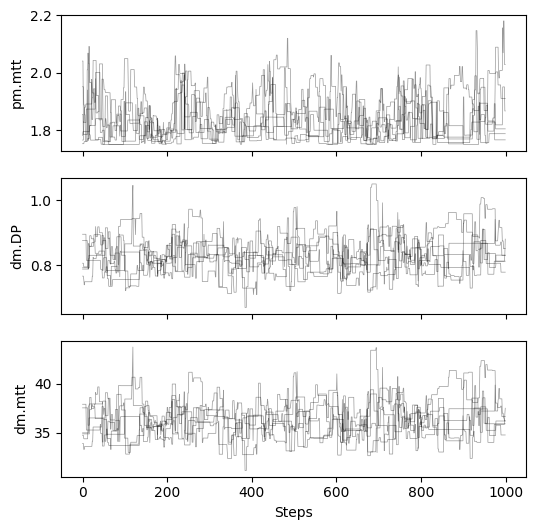

In [46]:
res_mcmc_4 = m4_solver.dream_sample(
    n_samples=n_samples,
    n_chains=None,
    burn_in=burn_in,
    thin=thin,
    cr=[i / n_cr for i in range(1, n_cr + 1)],
    sigma=sigma,
    start=[1., 1., 5.],
    return_sim=True,
    n_diff_pairs=2,
    random_state=42
)

# plot chains to inspect convergence
fig, ax = plt.subplots(res_mcmc_4["samples_chain"].shape[2], 1, figsize=(6, 6), sharex=True)

for i in range(res_mcmc_4["samples_chain"].shape[2]):
    for j in range(res_mcmc_4["samples_chain"].shape[0]):
        ax[i].plot(res_mcmc_4["samples_chain"][j, :, i], c="k", lw=.5, alpha=0.4)
    ax[i].set_ylabel(m4.param_keys(free_only=True)[i])
ax[-1].set_xlabel("Steps")

# print gelman rubin convergence statistics
print(res_mcmc_4["gelman_rubin"])

In [47]:
def nse(obs, sim):
    obs_ = obs.reshape(-1, 1)
    sim_ = sim.reshape(-1, 1)
    mask = ~np.isnan(obs_) & ~np.isnan(sim_)
    resid = sim_ - obs_
    dev = obs_ - np.nanmean(obs_)
    nse_ = 1 - np.sum(resid[mask] ** 2) / np.sum(dev[mask] ** 2)
    return nse_

print(nse(obs_series, res_1))

0.9991177723673367


In [48]:
res_mcmc_1.keys()

dict_keys(['param_names', 'samples', 'logpost', 'samples_chain', 'logpost_chain', 'accept_rate', 'accept_rate_per_chain', 'posterior_mean', 'posterior_median', 'posterior_map', 'map_logpost', 'gelman_rubin', 'sims'])

Text(0.5, 0, 'Residence Time $ [y] $')

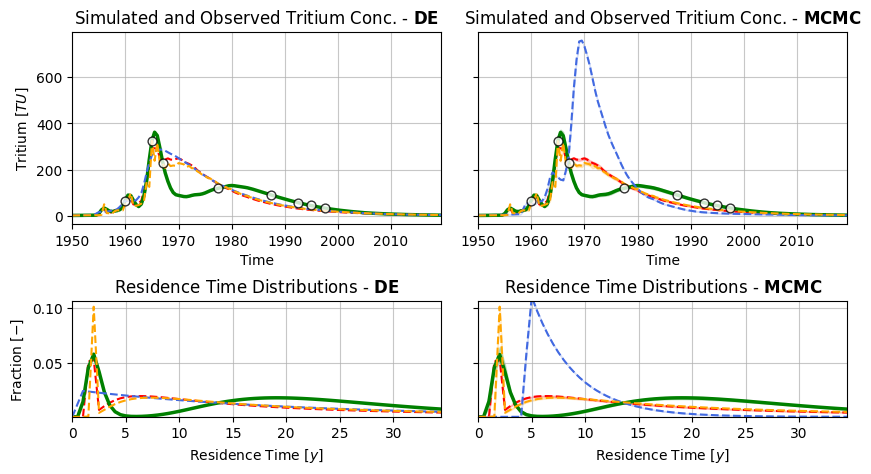

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5),
                       gridspec_kw={"height_ratios": [2, 1.2], "hspace": .5, "wspace": .1},
                       sharey="row", sharex="row")

ax1 = ax[1, :]
ax = ax[0, :]

data_sims = [res_2, res_1, res_3, res_4]
colors = ["red", "green", "royalblue", "orange"] # mpl.colormaps["Set2"].colors # ["r", "g", "b", "m"]
linestyles = ["--", "-", "--", "--"] # ["-.", "--", "-", ":"]
lws = [1.5, 2.5, 1.5, 1.5]
start = 100
end = 240

for num, sims in enumerate(data_sims):
    ax[0].plot(
        timestamps[start:end],
        sims[start:end],
        c=colors[num],
        ls=linestyles[num],
        lw=lws[num]
    )

ax[0].scatter(
    timestamps, obs_series,
    marker="o", facecolor="w",
    edgecolor="k", s=40,
    zorder=100, alpha=0.8,
    lw=1.
)

custom_lines = [Line2D([0], [0], color=colors[0], lw=lws[0], ls=linestyles[0]),
                Line2D([0], [0], color=colors[1], lw=lws[1], ls=linestyles[1]),
                Line2D([0], [0], color=colors[2], lw=lws[2], ls=linestyles[2]),
                Line2D([0], [0], color=colors[3], lw=lws[3], ls=linestyles[3]),
                Line2D([0], [0], marker="o", color="w", markeredgewidth=1.,
                    markerfacecolor="w", markeredgecolor="k", alpha=0.8)]

# ax[0].legend(
#     custom_lines,
#     [
#     fr"{dmfrac_21:.0%} $ DM_1 $ (${res_2_x["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_22:.0%} $ DM_2 $ (${res_2_x["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, res_2):.2f}",
#     fr"{dmfrac_11:.0%} $ DM_1 $ (${res_1_x["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_12:.0%} $ DM_2 $ (${res_1_x["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, res_1):.2f}",
#     fr"{dmfrac_31:.0%} $ DM_1 $ (${res_3_x["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_32:.0%} $ DM_2 $ (${res_3_x["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, res_3):.2f}",
#     fr"{dmfrac_41:.0%} $ DM_1 $ (${res_4_x["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_42:.0%} $ DM_2 $ (${res_4_x["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, res_4):.2f}",
#     "Observations"
#     ],
#     loc="upper right",
#     fontsize=6.5
# )
ax[0].set_title(r"Simulated and Observed Tritium Conc. - $ \mathbf{DE} $")
ax[0].grid(True, alpha=0.7, zorder=0)
ax[0].set_xlim([timestamps[start], timestamps[end-1]])
ax[0].set_xlabel("Time")
ax[0].set_ylabel(r"Tritium $ [TU] $")

mcmc_sims = [res_mcmc_2, res_mcmc_1, res_mcmc_3, res_mcmc_4]

median_sims = []
for num, sims in enumerate(mcmc_sims):
    # reshape simulations array
    chains = [1, 2, 3, 4, 5, 6, 7]
    sim_data = sims["sims"]
    s = sim_data.reshape((-1, sim_data.shape[-1]))
    q = np.quantile(s, [0.01, 0.5, 0.99], axis=0)
    median_sims.append(q[1])
    ax[1].plot(
        timestamps[start:end],
        q[1, start:end],
        c=colors[num],
        ls=linestyles[num],
        lw=lws[num]
    )
    ax[1].fill_between(
        timestamps[start:end],
        q[0, start:end], q[2, start:end],
        color=colors[num],
        alpha=0.2
    )

ax[1].scatter(
    timestamps, obs_series,
    marker="o", facecolor="w",
    edgecolor="k", s=40,
    zorder=100, alpha=0.8,
    lw=1.
)

# ax[1].legend(
#     custom_lines,
#     [
#     fr"{dmfrac_21:.0%} $ DM_1 $ (${res_mcmc_2["posterior_map"]["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_22:.0%} $ DM_2 $ (${res_mcmc_2["posterior_map"]["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, median_sims[0]):.2f}",
#     fr"{dmfrac_11:.0%} $ DM_1 $ (${res_mcmc_1["posterior_map"]["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_12:.0%} $ DM_2 $ (${res_mcmc_1["posterior_map"]["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, median_sims[1]):.2f}",
#     fr"{dmfrac_31:.0%} $ DM_1 $ (${res_mcmc_3["posterior_map"]["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_32:.0%} $ DM_2 $ (${res_mcmc_3["posterior_map"]["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, median_sims[2]):.2f}",
#     fr"{dmfrac_41:.0%} $ DM_1 $ (${res_mcmc_4["posterior_map"]["dm1.mtt"]:.1f}y$), " + \
#         fr"{dmfrac_42:.0%} $ DM_2 $ (${res_mcmc_4["posterior_map"]["dm2.mtt"]:.1f}y$), " + \
#             fr"NSE = {nse(obs_series, median_sims[3]):.2f}",
#     "Observations"
#     ],
#     loc="upper right",
#     fontsize=6.5,
# )
ax[1].set_title(r"Simulated and Observed Tritium Conc. - $ \mathbf{MCMC} $")
ax[1].grid(True, alpha=0.7, zorder=0)
ax[1].set_xlabel("Time")

# plot age distribution

step_limit = 70
dt = 0.5
t_plot = [dt * i for i in range(step_limit)]
# ax.plot(age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit])
# ax.plot(age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit])
for num, (ml, res_x) in enumerate(zip([m2, m1, m3, m4], [res_2_x, res_1_x, res_3_x, res_4_x])):
    # we have to set the model parameters again for each model because they
    # currently are at the last MCMC iteration
    for item in res_x.items():
        ml.set_param(key=item[0], value=item[1])
    age_distributions = ml.get_age_distributions()
    try:
        dist = age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit] + \
            age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit]
    except:
        dist = age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit]

    ax1[0].plot(
        t_plot, 
        dist,
        # marker=".",
        markeredgecolor=colors[num],
        lw=lws[num],
        c=colors[num],
        markerfacecolor="lightgrey",
        markersize=10,
        # clip_on=False,
        # zorder=1000
        ls=linestyles[num]
    )
ax1[0].set_xlim(0., step_limit * dt - dt)
ax1[0].set_ylim(0.0001)
ax1[0].grid(True, alpha=0.7, zorder=0)
ax1[0].set_title(r"Residence Time Distributions - $ \mathbf{DE} $")
ax1[0].set_xlabel(r"Residence Time $ [y] $")
ax1[0].set_ylabel(r"Fraction $ [-] $")

for num, (ml, s) in enumerate(zip([m2, m1, m3, m4], [res_mcmc_2, res_mcmc_1, res_mcmc_3, res_mcmc_4])):
    # get samples from MCMC
    s = s["samples"]
    # get random subset
    s = s[np.random.choice(s.shape[0], 2000, replace=True)]
    
    # iterate over samples
    age_dists = []
    for sample in s:
        # set model parameters
        for item in zip(ml.param_keys(free_only=True), sample):
            ml.set_param(key=item[0], value=item[1])
        # get age distribution
        age_distributions = ml.get_age_distributions()
        try:
            dist = age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit] + \
                age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit]
        except:
            dist = age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit]
        age_dists.append(
            dist
        )
    # plot
    ax1[1].plot(
        t_plot, 
        np.median(age_dists, axis=0),
        alpha=1.,
        c=colors[num],
        lw=lws[num],
        ls=linestyles[num]
    )
    ax1[1].fill_between(
        t_plot, 
        np.quantile(age_dists, 0.99, axis=0),
        np.quantile(age_dists, 0.01, axis=0),
        alpha=.2,
        color=colors[num]
    )

ax1[1].grid(True, alpha=0.7, zorder=0)
ax1[1].set_title(r"Residence Time Distributions - $ \mathbf{MCMC} $")
ax1[1].set_xlabel(r"Residence Time $ [y] $")

# ax.set_yscale("log")
# plt.savefig("calibration_benchmark.png", dpi=400, bbox_inches="tight")

In [41]:
res_mcmc_1.keys()

dict_keys(['param_names', 'samples', 'logpost', 'samples_chain', 'logpost_chain', 'accept_rate', 'accept_rate_per_chain', 'posterior_mean', 'posterior_median', 'posterior_map', 'map_logpost', 'gelman_rubin', 'sims'])

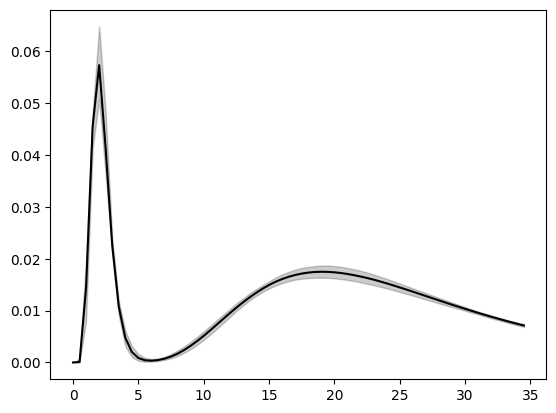

In [42]:
mls = [m1]
samples = [res_mcmc_1]

step_limit = 70
dt = 0.5
t_plot = [dt * i for i in range(step_limit)]

for num, (ml, s) in enumerate(zip(mls, samples)):
    # get samples from MCMC
    s = s["samples"]
    # get random subset
    s = s[np.random.choice(s.shape[0], 1000, replace=True)]
    
    # iterate over samples
    age_dists = []
    for sample in s:
        # set model parameters
        for item in zip(ml.param_keys(free_only=True), sample):
            ml.set_param(key=item[0], value=item[1])
        # get age distribution
        age_distributions = ml.get_age_distributions()
        age_dists.append(
            age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit] + \
            age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit]
        )
    # plot
    plt.plot(
        t_plot, 
        np.median(age_dists, axis=0),
        alpha=1.,
        c="k"
    )
    plt.fill_between(
        t_plot, 
        np.quantile(age_dists, 0.99, axis=0),
        np.quantile(age_dists, 0.01, axis=0),
        alpha=.2,
        color="k"
    )

## observations from diagram
- DE calibration
    - of the 4 different mixing ratios, 2 models produce very accurate results (40%-60% and 20%-80%)
    - 